In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

# 

In [2]:
# Problema # 1:

def imagen1(image_path, threshold=128):
    imagen2 = Image.open(image_path).convert('L')
    imagen3 = np.array(imagen2)
    valor = np.where(imagen3 > threshold, 255, 0)
    conversion = Image.fromarray(np.uint8(valor))
    return conversion
imagen4 = imagen1('img_gato.jpg', threshold=128)
imagen4.show()

In [3]:
# Problema # 2:

def imagen(imgn, threshold=128):
    imgsh = imgn.convert('L')
    array_imagen = np.array(imgsh)
    bin = np.where(array_imagen > threshold, 255, 0)
    return bin
def image_operations(imagen1, imagen2, threshold=128):
    imgp = Image.open(imagen1)
    imgs = Image.open(imagen2)
    assert imgp.size == imgs.size, "imagenes del mismo tamaño"
    binaria1 = imagen(imgp, threshold)
    binaria2 = imagen(imgs, threshold)
    sumatoria = np.clip(np.array(imgp) + np.array(imgs), 0, 255) # SUMA
    resta = np.clip(np.array(imgp) - np.array(imgs), 0, 255) # SUMA
    imageny = np.bitwise_and(binaria1, binaria2)
    imageno = np.bitwise_or(binaria1, binaria2)
    imgenoiy = np.bitwise_xor(binaria1, binaria2)
    sumatoria = Image.fromarray(np.uint8(sumatoria))
    resta = Image.fromarray(np.uint8(resta))
    imageny = Image.fromarray(np.uint8(imageny))
    imageno = Image.fromarray(np.uint8(imageno))
    imgenoiy = Image.fromarray(np.uint8(imgenoiy))
    return sumatoria, resta, imageny, imageno, imgenoiy
sum_img, subtract_img, and_img, or_img, xor_img = image_operations('imagen_igual1.jpg', 'imagen_igual2.jpg', threshold=128)
sum_img.show(title="sumatoria")
subtract_img.show(title="resta")
and_img.show(title="y")
or_img.show(title="o")
xor_img.show(title="xor")


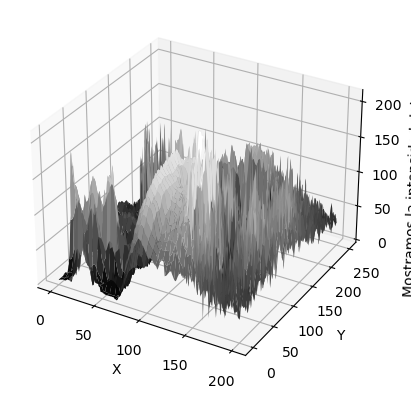

In [4]:
# Problema # 3:

def imagen_en_3D(imgp):

    gato = Image.open(imgp).convert('L')
    
    imagengato = np.array(gato) 
    x_dim, y_dim = imagengato.shape
    
    y = np.arange(0, y_dim, 1)
    x = np.arange(0, x_dim, 1)
    x, y = np.meshgrid(x, y)
    z = imagengato.T
    trazo = plt.figure()

    bza = trazo.add_subplot(111, projection='3d')
    bza.plot_surface(x, y, z, cmap='gray')

    bza.set_xlabel('X')
    bza.set_ylabel('Y')
    bza.set_zlabel('Mostramos la intensidad del color GRIS')
    plt.show() 
imagen_en_3D('img_gato_escala_de_grises.jpg') # Mostramos la gráfica

In [5]:
# Problema # 4:

# Negativa

def negativa(img1):
    img = Image.open(img1).convert('L')
    img_a = np.array(img)
    imagen_en_negativo = 255 - img_a
    return Image.fromarray(np.uint8(imagen_en_negativo))

# Lineal

def lineal(img2, a=1, b=0):
    img3 = Image.open(img2).convert('L')
    img4 = np.array(img3)
    imagen_en_lineal = a * img4 + b
    imagen_en_lineal = np.clip(imagen_en_lineal, 0, 255)
    return Image.fromarray(np.uint8(imagen_en_lineal))

# Logaritmica

def logar(imglog, c=1):
    logimg = Image.open(imglog).convert('L')
    imagena = np.array(logimg)
    imagen_en_logaritmica = c * np.log1p(imagena)  # log1p es log(1 + p)
    imagen_en_logaritmica = np.clip(imagen_en_logaritmica * (255 / np.log(256)), 0, 255)  # Escalando el resultado
    return Image.fromarray(np.uint8(imagen_en_logaritmica))

# Exponencial

def expo(imgexpo, c=1):
    imgzz = Image.open(imgexpo).convert('L')
    imagenb = np.array(imgzz)
    imagen_en_exponencial = c * (np.exp(imagenb / 255) - 1)
    imagen_en_exponencial = np.clip(imagen_en_exponencial * (255 / (np.exp(1) - 1)), 0, 255)  # Escalando el resultado
    return Image.fromarray(np.uint8(imagen_en_exponencial))

resultado_negativo = negativa('img_gato.jpg')
resultado_lineal = lineal('img_gato.jpg', a=1.2, b=20)
resultado_logaritmico = logar('img_gato.jpg', c=30)
resultado_exponencial = expo('img_gato.jpg', c=1)

# Resultados

resultado_negativo.show(title="transformación negativa")
resultado_lineal.show(title="transformación ineal")
resultado_logaritmico.show(title="transformación logarítmica")
resultado_exponencial.show(title="transformación exponencial")

In [6]:
# Problema # 5:

# El kernel laplaciano es un operador matemático que se utiliza en el procesamiento de imágenes para detectar cambios bruscos en la intensidad de los píxeles. 
# Esencialmente, calcula la segunda derivada de la intensidad de la imagen.

##### ¿Cómo funciona?

# Convolución: Se aplica un filtro (el kernel laplaciano) a la imagen. Este filtro resalta los cambios bruscos en la intensidad, 
# que corresponden a los bordes.

# Sensibilidad al ruido: El laplaciano es muy sensible al ruido, ya que amplifica los cambios de intensidad, incluso los causados por el ruido. 
# Por esta razón, suele utilizarse un filtro gaussiano antes de aplicar el laplaciano para suavizar la imagen y reducir el ruido.

##### Diferencias:	

# Kernel Laplaciano

# Sensibilidad al ruido: Alta 
# Precisión:Baja
# Detección de bordes	Internos y externos	Solo externos: Internos y externos
# Información direccional: No
# Complejidad: Baja
# Velocidad: Rápido 

# Algoritmo de Canny

# Sensibilidad al ruido: Baja
# Precisión: Alta
# Detección de bordes	Internos y externos	Solo externos: Solo externos
# Información direccional: Si
# Complejidad: Alta
# Velocidad: Lento